# __Convolution Neural Network__

In [1]:
import tensorflow as tf

In [2]:
from os import path

In [3]:
base_dir = 'C:\\Users\\sysadmin\\ai-research-dev\\Machine Learning\\Cats and dogs'

In [4]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [5]:
from tensorflow.keras.layers import Conv2D, Activation, MaxPool2D

In [6]:
training_dir = base_dir + '\\train'
validation_dir = base_dir + '\\validation'

#### All images need to the of same size to go through CNN

#### we are gonna stick with 255 x 255 x 3 size. where height = 255 px, breadth = 255 px and color channel = 3 (RGB)

In [7]:
model.add(Conv2D(32, (3,3), input_shape=(250,250,3)))  # Conv2d(filters, (size x size of filter))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16, (3,3)))  # this is second layer and so this and further layers do not require an input shape 
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(16, (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 248, 248, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 16)      4624      
_________________________________________________________________
activation_1 (Activation)    (None, 122, 122, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 16)        2

###  Now we need a flattening layer and an ANN

In [9]:
from tensorflow.keras.layers import Flatten

model.add(Flatten())

### Now we are gonna build a ANN around our flattened data

In [10]:
from tensorflow.keras.layers import Dense, Dropout

In [11]:
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation(tf.nn.sigmoid))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 248, 248, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 16)      4624      
_________________________________________________________________
activation_1 (Activation)    (None, 122, 122, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 16)        2

## Once we are done with creating the model we need to compile our model

In [13]:
# next try using rmsprop as optimizser
# model.compile(
#     loss = 'binary_crossentropy',
#     optimizer = 'adam',
#     metrics = ['accuracy']
# )

model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'rmsprop',
    metrics = ['accuracy']
)

# Now we need to get the data and then train the model

- We are gonna need image data generator

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
# this is the generator that we shall use to read our images as images in the training set or in any dataset
# can be of various sizes and features and we need to convert them to the required size of 250x250x3 
# ImageDataGenerator does that job for us

train_datagen = ImageDataGenerator(
    rescale = 1./255, # the dot is just to convert to float
    rotation_range=15, # to rotate any image randomly upto 15 degrees
    zoom_range=0.1
)

# test data cannot have any other manipulations otherwise the results wont be reliable
test_datagen = ImageDataGenerator(
    rescale=1./255
)

In [16]:
batch_size = 32

In [17]:
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size=(250,250),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(250,250),
    batch_size=batch_size,
    class_mode='binary'
)

Found 1602 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


# Train the model

In [27]:
model.fit(
    train_generator,
    steps_per_epoch=1602//batch_size,
    epochs=32,
    validation_data=test_generator,
    validation_steps=400//batch_size
)

Epoch 1/32
50/50 [==============================] - 59s 1s/step - loss: 0.6955 - accuracy: 0.5102 - val_loss: 0.6864 - val_accuracy: 0.5417
Epoch 2/32
50/50 [==============================] - 64s 1s/step - loss: 0.6894 - accuracy: 0.5497 - val_loss: 0.6851 - val_accuracy: 0.5365
Epoch 3/32
50/50 [==============================] - 66s 1s/step - loss: 0.6760 - accuracy: 0.5860 - val_loss: 0.6681 - val_accuracy: 0.6224
Epoch 4/32
50/50 [==============================] - 68s 1s/step - loss: 0.6499 - accuracy: 0.6159 - val_loss: 0.6410 - val_accuracy: 0.6094
Epoch 5/32
50/50 [==============================] - 68s 1s/step - loss: 0.6377 - accuracy: 0.6631 - val_loss: 0.6440 - val_accuracy: 0.6016
Epoch 6/32
50/50 [==============================] - 69s 1s/step - loss: 0.6290 - accuracy: 0.6631 - val_loss: 0.6139 - val_accuracy: 0.6693
Epoch 7/32
50/50 [==============================] - 69s 1s/step - loss: 0.5947 - accuracy: 0.7013 - val_loss: 0.6053 - val_accuracy: 0.6641
Epoch 8/32
50/50 [==

In [19]:
model.save_weights('my_rmsprop_weights2.h5')

# to avoid retraining the model we can just load the weights we just saved as below
# model.load_weights('my_rmsprop_weights.h5') or model.load_weights('my_adam_weights.h5')

In [42]:
#image_name = validation_dir+"\\dogs\\dog.816.jpg"
image_name = 'trail_cat.jpg'

In [43]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

img = load_img(image_name)
x = img_to_array(img.resize([250,250]))
x = x.reshape((1,) + x.shape)

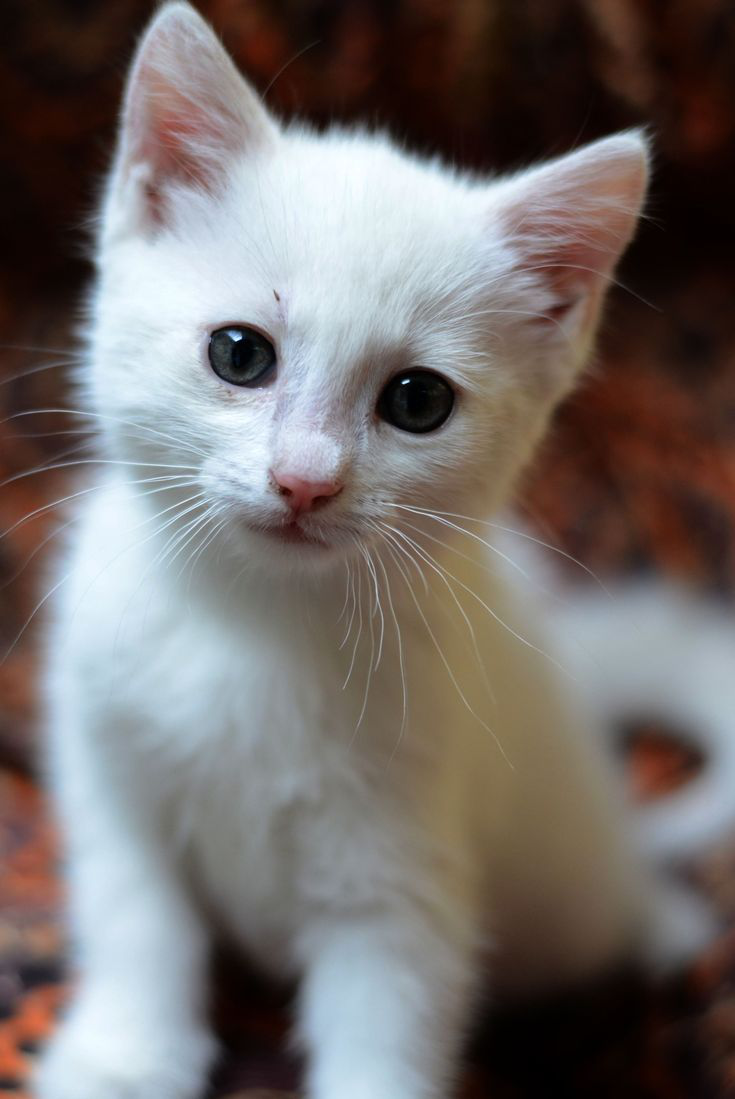

In [44]:
img

In [38]:
import numpy as np

In [45]:
if int(model.predict(x)[0][0]) == 0:
    print('Cat')
else:
    print('Dog')

Cat


In [25]:
#model.load_weights('my_adam_weights.h5')

In [26]:
# if int(np.argmax(model.predict(x), axis=-1)[0]) == 0:
#     print('CAT')
# else:
#     print('DOG')

# training you model for more epochs can fail as it did here 

# this model is biased towards cats or to be more precise towards class 0